*** Processing sheet: Gator ***

--- Configuring Random Forest model for'gator'---
Top 5 Variables:
   Feature  Importance  Normalized Importance
13  htotal    0.105521               1.000000
4      Gmb    0.100984               0.957001
3      Gmm    0.078610               0.744966
11  p_num4    0.074435               0.705404
5    voids    0.073793               0.699317


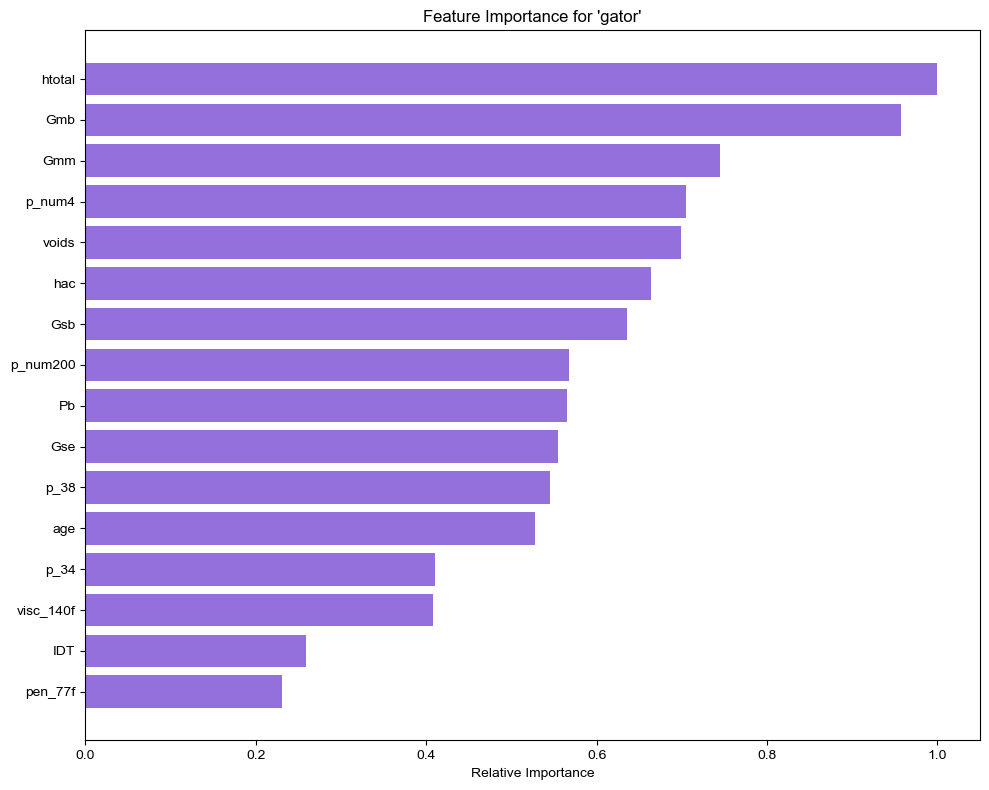

----------------------------------------

*** Processing sheet: Longwp ***

--- Configuring Random Forest model for'longwp'---
Top 5 Variables:
     Feature  Importance  Normalized Importance
11    p_num4    0.116350               1.000000
13    htotal    0.107928               0.927610
14       hac    0.101765               0.874641
12  p_num200    0.074433               0.639730
10      p_38    0.069729               0.599305


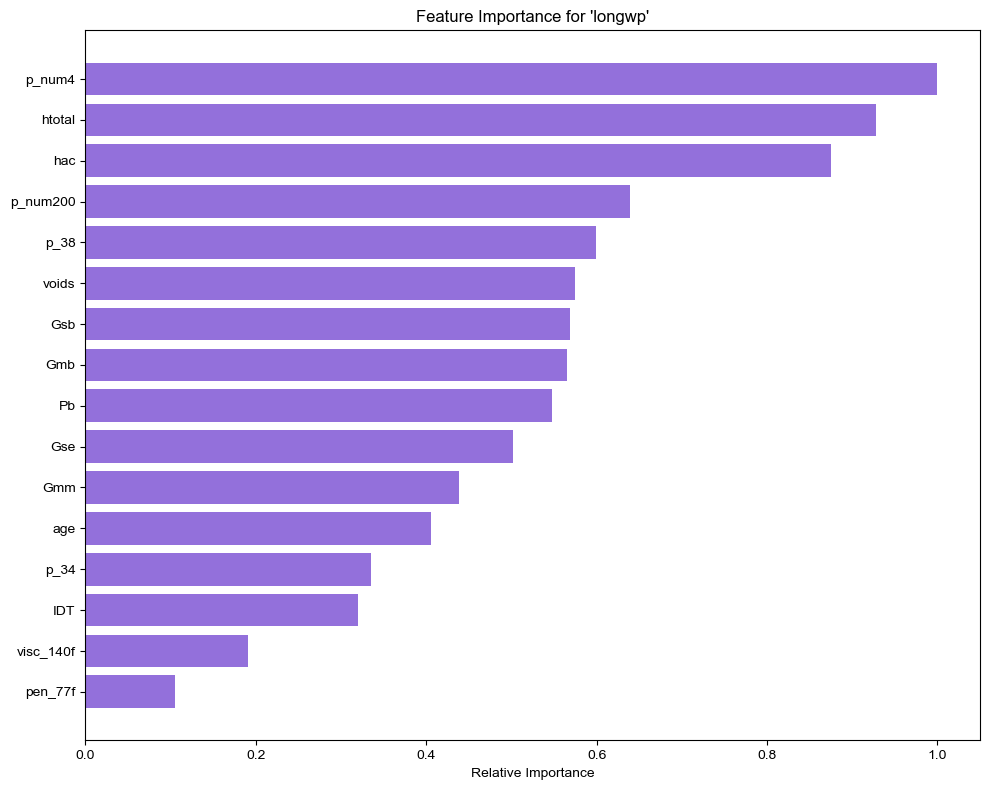

----------------------------------------

*** Processing sheet: Trans ***

--- Configuring Random Forest model for'trans'---
Top 5 Variables:
   Feature  Importance  Normalized Importance
14     hac    0.088633               1.000000
4      Gmb    0.083324               0.940103
15     age    0.074352               0.838880
10    p_38    0.074219               0.837380
7      Gse    0.073773               0.832338


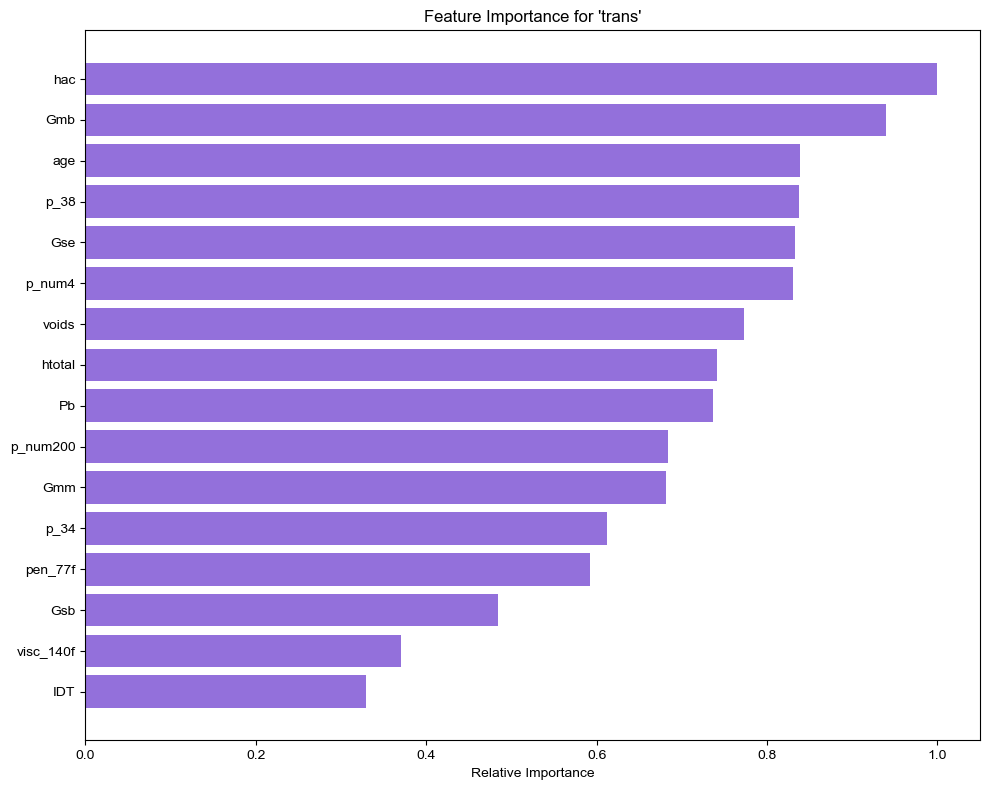

----------------------------------------

*** Processing sheet: Rutting ***

--- Configuring Random Forest model for'rut'---
Top 5 Variables:
     Feature  Importance  Normalized Importance
12  p_num200    0.129065               1.000000
5      voids    0.118863               0.920951
0         Pb    0.114020               0.883428
13    htotal    0.080107               0.620672
14       hac    0.070569               0.546771


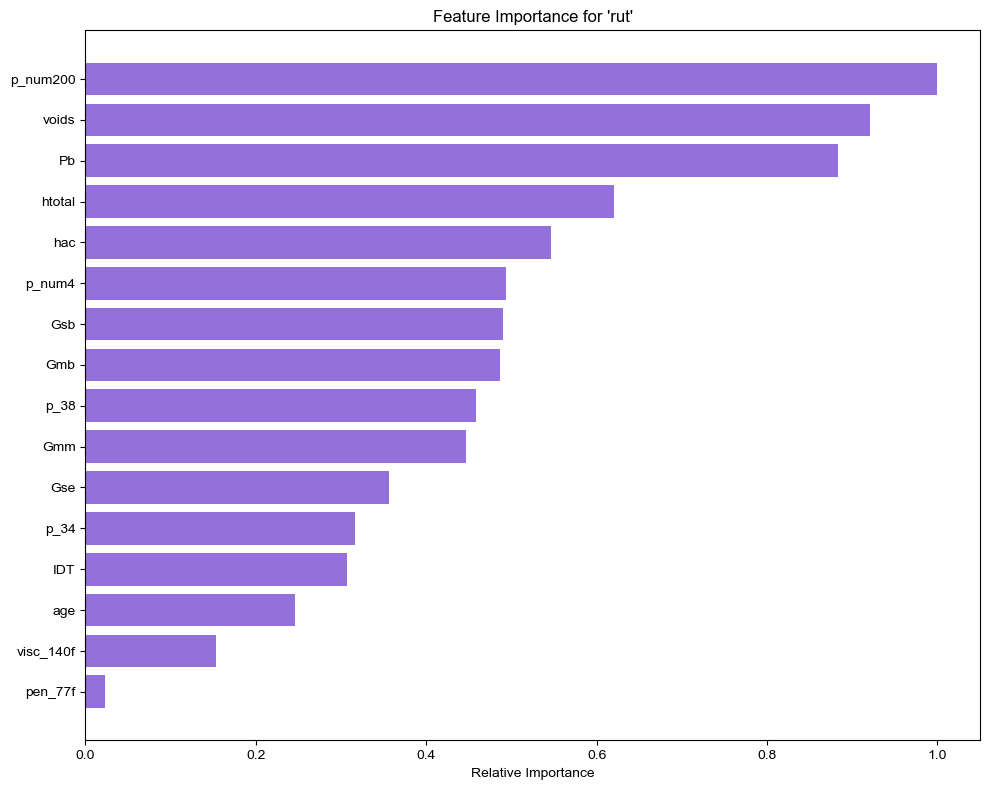

----------------------------------------

*** Processing sheet: Roughness ***

--- Configuring Random Forest model for'iri'---
Top 5 Variables:
    Feature  Importance  Normalized Importance
13   htotal    0.121444               1.000000
5     voids    0.101242               0.833650
3       Gmm    0.081702               0.672749
1   pen_77f    0.074666               0.614821
0        Pb    0.064161               0.528314


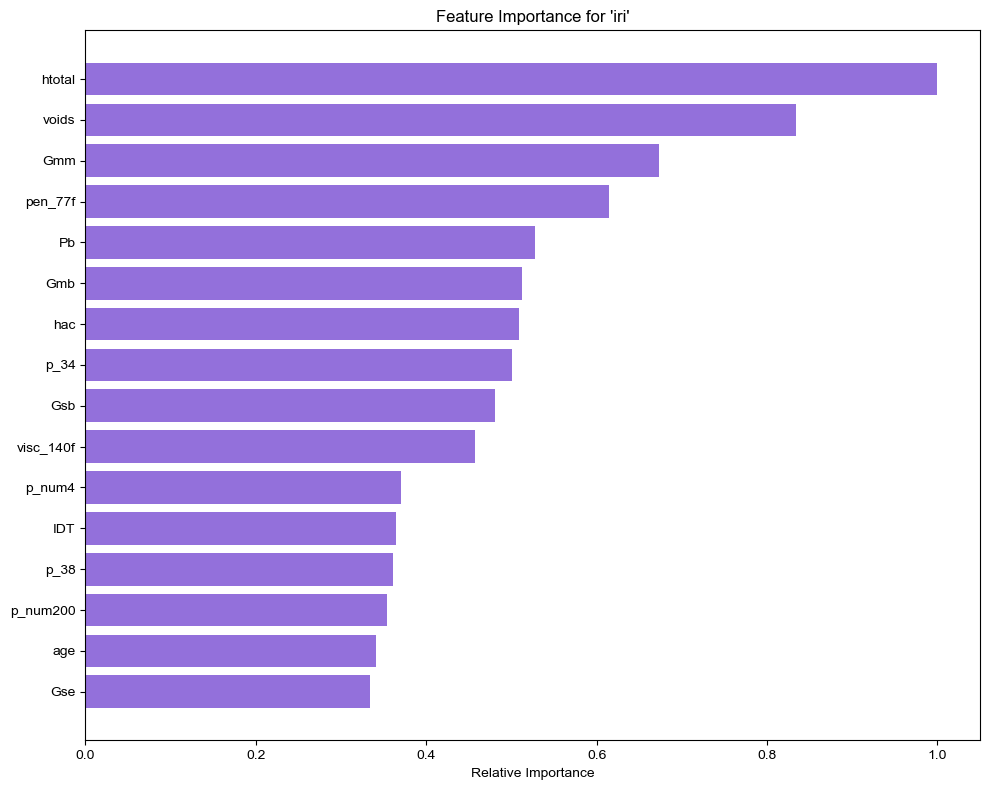

----------------------------------------



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.unicode_minus'] = False


def run_random_forest_analysis(X, y, target_name, model_config):
   
    print(f"--- Configuring Random Forest model for'{target_name}'---")
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    rf_model = RandomForestRegressor(
        n_estimators=model_config['B'],
        max_features=model_config['m'],
        random_state=42,
        oob_score=True,
        n_jobs=-1
    )
    rf_model.fit(X_train, y_train)
    
    importances = rf_model.feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importances
    })

    max_importance = feature_importance_df['Importance'].max()
    if max_importance > 0:
        feature_importance_df['Normalized Importance'] = feature_importance_df['Importance'] / max_importance
    else:
        feature_importance_df['Normalized Importance'] = 0.0

    feature_importance_df = feature_importance_df.sort_values(by='Normalized Importance', ascending=False)
    
    print("Top 5 Variables:")
    print(feature_importance_df.head())
    
    plt.figure(figsize=(10, 8))
    plt.barh(feature_importance_df['Feature'], feature_importance_df['Normalized Importance'], color='mediumpurple')
    plt.xlabel('Relative Importance')
    plt.title(f"Feature Importance for '{target_name}'")
    plt.gca().invert_yaxis()
    plt.xlim(0, 1.05) 
    plt.tight_layout()
    plt.show()
    print("-" * 40 + "\n")

try:
    excel_file_name = '00 LTPP Data Final v4.xlsx'
    sheet_names = ['Gator', 'Longwp', 'Trans', 'Rutting', 'Roughness']

    sheet_to_target_map = {
        'Gator': 'gator', 'Longwp': 'longwp', 'Trans': 'trans',
        'Rutting': 'rut', 'Roughness': 'iri'
    }

    model_configurations = {
        'gator':   {'B': 128, 'm': 6}, 'longwp':  {'B': 112, 'm': 5},
        'trans':   {'B': 114, 'm': 6}, 'rut':     {'B': 106, 'm': 5},
        'iri':     {'B': 122, 'm': 6},
    }

    for sheet in sheet_names:
        print(f"*** Processing sheet: {sheet} ***\n")
        df = pd.read_excel(excel_file_name, sheet_name=sheet, header=0)

        X_data = df.iloc[:, 2:18]
        target_col_name = sheet_to_target_map[sheet]
        
        if target_col_name in df.columns:
            y_data_series = df[target_col_name]
            
            X_data_engineered = X_data.copy()
            if 'AGE' in X_data_engineered.columns:
                X_data_engineered['AGE_squared'] = X_data_engineered['AGE']**1
                print(">>> Analyzing with 'AGE_squared'.\n")
            
            model_config = model_configurations[target_col_name]
            
            run_random_forest_analysis(
                X_data_engineered, 
                y_data_series, 
                target_col_name, 
                model_config
            )
        else:
            print(f"'{sheet}' sheet, target variable '{target_col_name}'could not be found.")

except FileNotFoundError:
    print(f"Error: '{excel_file_name}' File is not found.")
except Exception as e:
    print(f"Unknown Error: {e}")